# Injection plot comparision
* TF2Ecck Vs TF2Ecch Vs TF2Ecc Vs TF2

<table ><tr><th > waveform <th><th> PN <th><th> spin <th><th> eccentricity<th><th> periastron adv<th><th> harmonics <tr><tr>
<tr><td> TF2Ecck  <td><td> 3PN  <td><td> No <td><td> Yes <td><td> Yes<td><td> Yes <td><tr>
<tr><td> TF2Ecch  <td><td> 3PN  <td><td> No <td><td> Yes <td><td> No<td><td> Yes <td><tr>
<tr><td> TF2Ecc  <td><td> 3PN  <td><td> No <td><td> Yes <td><td> No<td><td> No <td><tr>
<tr><td> TF2  <td><td> 3PN  <td><td> No <td><td> No <td><td> No<td><td> No <td><tr><table> 

In [1]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [2]:
time_of_event = 1246527184.169434
post_trigger_duration = 1.
duration = 6.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 4096.

* injection of GW150914 like event
* spinless case
* f_min = 10Hz

In [3]:
# mass to chirp_mass and mass_ratio conversion 
mass_1 = 36.
mass_2 = 29.

chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1
print("chirp_mass = {}, mass_ratio = {}".format(chirp_mass, mass_ratio))

ff = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
print("flso = {}".format(ff))

chirp_mass = 28.09555579546043, mass_ratio = 0.8055555555555556
flso = 67.6310005682923


In [4]:
# chirp_mass/mass_ratio to m1/m2
chirp_mass_ = 28.09555579546043
mass_ratio_ =  0.8055555555555556

mass_1_ = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
mass_2_ = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)
print("mass_1 = {}, mass_2 = {}".format(mass_1_, mass_2_))
ff = (C**3)/( G*(mass_1_+mass_2_)*Mo*np.pi*6**(3/2) )
print("flso = {}".format(ff))

mass_1 = 35.99999999999999, mass_2 = 28.999999999999996
flso = 67.63100056829231


# With non-zero eccentricity

### injection parameters

In [5]:
injection_parameters = {'mass_1':36., 'mass_2':29., 'eccentricity':0.0, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.4, 'psi':2.659, 
                         'phase':1.3, 'geocent_time':1246527184.169434, 'ra':1.375, 'dec':-1.2108,}

In [6]:
############# TF2Ecck waveform model ################
waveform_arguments = dict(waveform_approximant='TaylorF2Ecck',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

14:03 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [7]:
minimum_frequency = 10.0
maximum_frequency = 67

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
print('net_snr = ',np.sqrt(np.sum([i ** 2 for i in snrs])))

14:03 bilby INFO    : Injected signal in H1:
14:03 bilby INFO    :   optimal SNR = 40.44
14:03 bilby INFO    :   matched filter SNR = 40.00+0.23j
14:03 bilby INFO    :   mass_1 = 36.0
14:03 bilby INFO    :   mass_2 = 29.0
14:03 bilby INFO    :   eccentricity = 0.0
14:03 bilby INFO    :   a_1 = 0.0
14:03 bilby INFO    :   a_2 = 0.0
14:03 bilby INFO    :   tilt_1 = 0.0
14:03 bilby INFO    :   tilt_2 = 0.0
14:03 bilby INFO    :   phi_12 = 0.0
14:03 bilby INFO    :   phi_jl = 0.0
14:03 bilby INFO    :   luminosity_distance = 600.0
14:03 bilby INFO    :   theta_jn = 0.4
14:03 bilby INFO    :   psi = 2.659
14:03 bilby INFO    :   phase = 1.3
14:03 bilby INFO    :   geocent_time = 1246527184.169434
14:03 bilby INFO    :   ra = 1.375
14:03 bilby INFO    :   dec = -1.2108
14:03 bilby INFO    : Injected signal in L1:
14:03 bilby INFO    :   optimal SNR = 30.43
14:03 bilby INFO    :   matched filter SNR = 29.30+0.38j
14:03 bilby INFO    :   mass_1 = 36.0
14:03 bilby INFO    :   mass_2 = 29.0
14:0

net_snr =  50.61147421134975


In [8]:
# speed test
%timeit waveform_generator.frequency_domain_strain(parameters=injection_parameters)

12.5 µs ± 39.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
############# TF2Ecch waveform model ################
waveform_arguments2 = dict(waveform_approximant='TaylorF2Ecch',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments2)

minimum_frequency = 10.0
maximum_frequency = 67

ifos2 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos2:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos2.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters)

snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos2]
print('net_snr = ','net_snr = ',np.sqrt(np.sum([i ** 2 for i in snrs])))

14:03 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
14:03 bilby INFO    : Injected signal in H1:
14:03 bilby INFO    :   optimal SNR = 40.44
14:03 bilby INFO    :   matched filter SNR = 40.77+0.72j
14:03 bilby INFO    :   mass_1 = 36.0
14:03 bilby INFO    :   mass_2 = 29.0
14:03 bilby INFO    :   eccentricity = 0.0
14:03 bilby INFO    :   a_1 = 0.0
14:03 bilby INFO    :   a_2 = 0.0
14:03 bilby INFO    :   tilt_1 = 0.0
14:03 bilby INFO    :   tilt_2 = 0.0
14:03 bilby INFO    :   phi_12 = 0.0
14:03 bilby INFO    :   phi_jl = 0.0
14:03 bilby INFO    :   luminosity_distance = 600.0
14:03 bilby INFO    :   theta_jn = 0.4
14:03 bilby INFO    :   psi = 2.659
14:03 bilby INFO    :   phase = 1.3
14:03 bilby INFO    :   geocent_time = 1246527184.169434
14:03 bilby INFO    :   ra = 1.3

net_snr =  net_snr =  50.611474211349766


In [13]:
# speed test
%timeit waveform_generator2.frequency_domain_strain(parameters=injection_parameters)

12.9 µs ± 24.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
############# TF2Ecc waveform model ################
waveform_arguments3 = dict(waveform_approximant='TaylorF2Ecc',
                          reference_frequency=10., minimum_frequency=10., pn_phase_order=6, pn_tidal_order=0)

waveform_generator3 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments3)

minimum_frequency = 10.0
maximum_frequency = 67

ifos3 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos3:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos3.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters)

snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos3]
print('net_snr = ',np.sqrt(np.sum([i ** 2 for i in snrs])))

14:03 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
14:03 bilby INFO    : Injected signal in H1:
14:03 bilby INFO    :   optimal SNR = 40.44
14:03 bilby INFO    :   matched filter SNR = 40.90+1.04j
14:03 bilby INFO    :   mass_1 = 36.0
14:03 bilby INFO    :   mass_2 = 29.0
14:03 bilby INFO    :   eccentricity = 0.0
14:03 bilby INFO    :   a_1 = 0.0
14:03 bilby INFO    :   a_2 = 0.0
14:03 bilby INFO    :   tilt_1 = 0.0
14:03 bilby INFO    :   tilt_2 = 0.0
14:03 bilby INFO    :   phi_12 = 0.0
14:03 bilby INFO    :   phi_jl = 0.0
14:03 bilby INFO    :   luminosity_distance = 600.0
14:03 bilby INFO    :   theta_jn = 0.4
14:03 bilby INFO    :   psi = 2.659
14:03 bilby INFO    :   phase = 1.3
14:03 bilby INFO    :   geocent_time = 1246527184.169434
14:03 bilby INFO    :   ra = 1.3

net_snr =  50.61286447709168


In [ ]:
# speed test
%timeit waveform_generator3.frequency_domain_strain(parameters=injection_parameters)

In [10]:
############# TaylorF2 waveform model ################
waveform_arguments4 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=10., minimum_frequency=10., pn_phase_order=6, pn_amplitude_order=0., pn_tidal_order=0)

waveform_generator4 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments4)

minimum_frequency = 10.0
maximum_frequency = 67

ifos4 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos4:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos4.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos4.inject_signal(waveform_generator=waveform_generator4,
                   parameters=injection_parameters)

snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos4]
print('net_snr = ',np.sqrt(np.sum([i ** 2 for i in snrs])))

14:03 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
14:03 bilby INFO    : Injected signal in H1:
14:03 bilby INFO    :   optimal SNR = 40.44
14:03 bilby INFO    :   matched filter SNR = 39.96-0.02j
14:03 bilby INFO    :   mass_1 = 36.0
14:03 bilby INFO    :   mass_2 = 29.0
14:03 bilby INFO    :   eccentricity = 0.0
14:03 bilby INFO    :   a_1 = 0.0
14:03 bilby INFO    :   a_2 = 0.0
14:03 bilby INFO    :   tilt_1 = 0.0
14:03 bilby INFO    :   tilt_2 = 0.0
14:03 bilby INFO    :   phi_12 = 0.0
14:03 bilby INFO    :   phi_jl = 0.0
14:03 bilby INFO    :   luminosity_distance = 600.0
14:03 bilby INFO    :   theta_jn = 0.4
14:03 bilby INFO    :   psi = 2.659
14:03 bilby INFO    :   phase = 1.3
14:03 bilby INFO    :   geocent_time = 1246527184.169434
14:03 bilby INFO    :   ra = 1.3

net_snr =  50.61286447709168


In [ ]:
# speed test
%timeit waveform_generator4.frequency_domain_strain(parameters=injection_parameters)

# Amplitude evolution comparision plot

In [11]:
#to plot the frequency domain  
############# TF2Ecck waveform model ################
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]
idxs = H1.strain_data.frequency_mask  

############# TF2Ecch ################
injection2 = ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters)
H12 = ifos2[0]
H1_injection2 = injection2[0]
idxs2 = H12.strain_data.frequency_mask

############# TF2Ecc ################
injection3 = ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters)
H13 = ifos3[0]
H1_injection3 = injection3[0]
idxs3 = H13.strain_data.frequency_mask

############# TF2 ################
injection4 = ifos4.inject_signal(waveform_generator=waveform_generator4,
                   parameters=injection_parameters)
H14 = ifos4[0]
H1_injection4 = injection4[0]
idxs4 = H14.strain_data.frequency_mask

14:03 bilby INFO    : Injected signal in H1:
14:03 bilby INFO    :   optimal SNR = 40.44
14:03 bilby INFO    :   matched filter SNR = 80.44+0.23j
14:03 bilby INFO    :   mass_1 = 36.0
14:03 bilby INFO    :   mass_2 = 29.0
14:03 bilby INFO    :   eccentricity = 0.0
14:03 bilby INFO    :   a_1 = 0.0
14:03 bilby INFO    :   a_2 = 0.0
14:03 bilby INFO    :   tilt_1 = 0.0
14:03 bilby INFO    :   tilt_2 = 0.0
14:03 bilby INFO    :   phi_12 = 0.0
14:03 bilby INFO    :   phi_jl = 0.0
14:03 bilby INFO    :   luminosity_distance = 600.0
14:03 bilby INFO    :   theta_jn = 0.4
14:03 bilby INFO    :   psi = 2.659
14:03 bilby INFO    :   phase = 1.3
14:03 bilby INFO    :   geocent_time = 1246527184.169434
14:03 bilby INFO    :   ra = 1.375
14:03 bilby INFO    :   dec = -1.2108
14:03 bilby INFO    : Injected signal in L1:
14:03 bilby INFO    :   optimal SNR = 30.43
14:03 bilby INFO    :   matched filter SNR = 59.74+0.38j
14:03 bilby INFO    :   mass_1 = 36.0
14:03 bilby INFO    :   mass_2 = 29.0
14:0

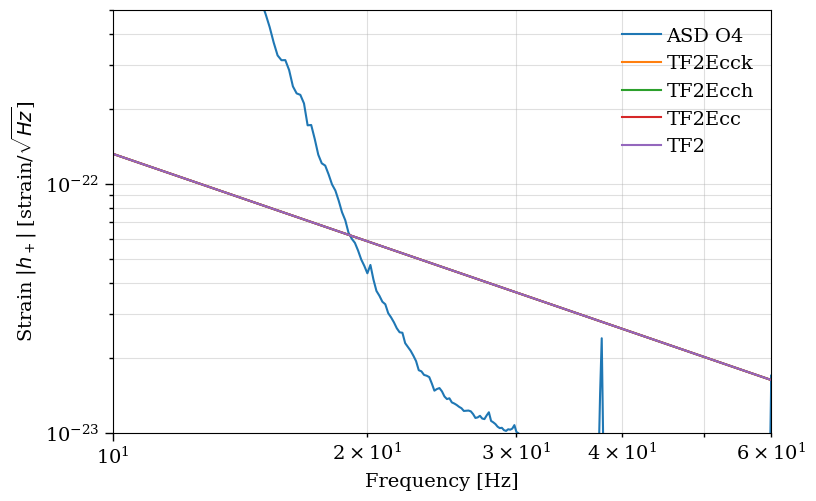

In [14]:
#############################
fig, ax = plt.subplots()
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD O4")

ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="TF2Ecck")

#############################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TF2Ecch")

#############################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TF2Ecc")

#############################
ax.loglog(H14.frequency_array[idxs4],
          np.abs(H1_injection4["plus"][idxs4]),
          label="TF2")

#############################

ax.set_xlim(10.,60.)
ax.set_ylim(1e-23,0.5e-21)
fig.set_size_inches(8.5, 5.5)
plt.rcParams.update({'font.size': 14})
ax.set_xlabel("Frequency [Hz]", fontsize=14)
ax.set_ylabel(r"Strain $|h_+|$ [strain/$\sqrt{Hz}$]", fontsize=14)
ax.legend()
ax.grid(True, which="both", ls="-", alpha=0.4)
fig.savefig("amplitude_sanity_test_zero_e0.pdf")
plt.show()

### Notes
* amplitude fluctuation can be seen due perence of harmonics in TF2Ecck and TF2Ecch
* this fluction dies out incresing frequency (eccentricity also reduced) and tends to TF2 

# phase evolution comparision plot

## plus polararization

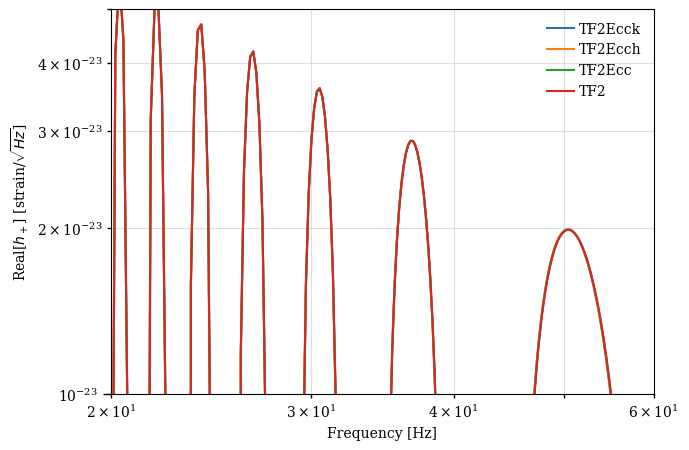

In [14]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="TF2Ecck")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TF2Ecch")

############# TaylorF2Ecc waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.real(H1_injection4["plus"][idxs4]),
          label="TF2")

#############################
ax.set_xlim(20.,60.)
ax.set_ylim(1e-23,5e-23)

fig.set_size_inches(7, 5)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel(r"Real[$h_+$] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.savefig("phase_sanity_test_non_zero_e0.png")
ax.grid(True, which="both", ls="-", alpha=0.4)
fig.savefig("phase_sanity_test_zero_e0.png")
plt.show()

## cross polarization

### Imaginary part

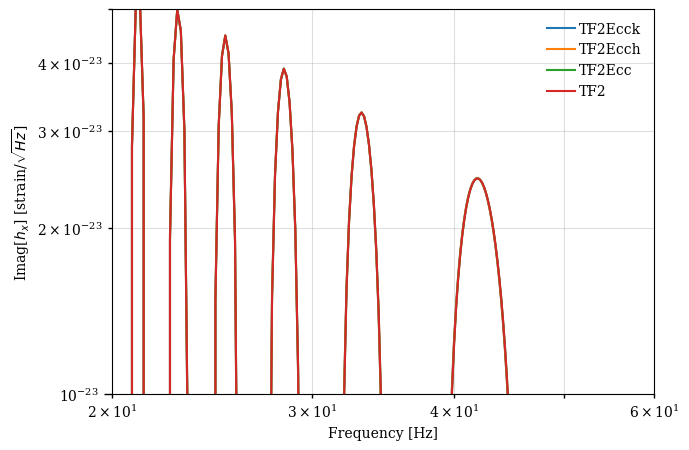

In [15]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.imag(H1_injection["cross"][idxs]),
          label="TF2Ecck")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.imag(H1_injection2["cross"][idxs2]),
          label="TF2Ecch")

############# TaylorF2Ecc waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.imag(H1_injection3["cross"][idxs3]),
          label="TF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.imag(H1_injection4["cross"][idxs4]),
          label="TF2")

#############################
ax.set_xlim(20.,60.)
ax.set_ylim(1e-23,5e-23)

fig.set_size_inches(7, 5)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel(r"Imag[$h_x$] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.savefig("amplitude_sanity_test_non_zero_e0.png")
ax.grid(True, which="both", ls="-", alpha=0.4)
fig.savefig("phase_sanity_test_zero_e0.png")
plt.show()

### real part

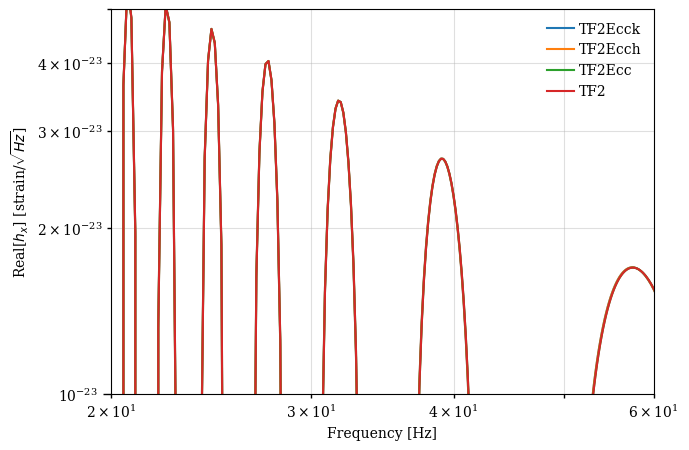

In [16]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["cross"][idxs]),
          label="TF2Ecck")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["cross"][idxs2]),
          label="TF2Ecch")

############# TaylorF2Ecc waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["cross"][idxs3]),
          label="TF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.real(H1_injection4["cross"][idxs4]),
          label="TF2")

#############################
ax.set_xlim(20.,60.)
ax.set_ylim(1e-23,5e-23)

fig.set_size_inches(7, 5)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel(r"Real[$h_x$] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.savefig("amplitude_sanity_test_non_zero_e0.png")
ax.grid(True, which="both", ls="-", alpha=0.4)
fig.savefig("phase_sanity_test_zero_e0.png")
plt.show()

### Notes
* phase evolution almost the same for the TF2Ecck, TF2Ecch and TF2Ecc
* all the above three have eccentricity effect

# match test

In [33]:
from pycbc.filter.matchedfilter import match
from pycbc.types.frequencyseries import FrequencySeries

OSError: libmkl_rt.so.2: cannot open shared object file: No such file or directory

In [16]:
injection_parameters2 = {'mass_1':36., 'mass_2':29., 'eccentricity':0.1, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.0, 'psi':0., 
                         'phase':0., 'geocent_time':1246527184.169434, 'ra':0., 'dec':0.,}

In [19]:
polas1 = waveform_generator.frequency_domain_strain(parameters = injection_parameters2)
polas2 = waveform_generator4.frequency_domain_strain(parameters = injection_parameters2)
arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
psd_ = FrequencySeries(H1.power_spectral_density_array, delta_f=1/duration)

In [18]:
print('match=',match(arr1, arr2, psd=psd_, \
      low_frequency_cutoff=10, high_frequency_cutoff=67))

match= (0.9999998301576224, 0)


In [20]:
print('match=',match(arr1, arr2, psd=psd_, \
      low_frequency_cutoff=10, high_frequency_cutoff=67))

match= (0.9999998301576213, 0)


* TaylorF2Ecck Vs TaylorF2Ecc, match = 